/home/harriet/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/harriet/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/harriet/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=1.
  warn(msg, IDWarning)
/home/harriet/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=2.
  warn(msg, IDWarning)
/home/harriet/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=3.
  warn(msg, IDWarning)
/home/harriet/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance alr

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/harriet/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another PlotBase instance already exists with id=1.
  warn(msg, IDWarning)


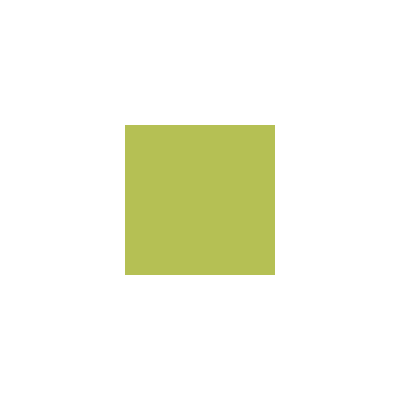

[(( 0.        , 0.  , 0.       ), (-0.66165219, 0.7456147, 0.0792155), 14000000., 0.00000000e+00, 1., 1, 0, 1)
 ((-0.66554366, 0.75, 0.0796814), (-0.66165219, 0.7456147, 0.0792155), 14000000., 1.96527015e-10, 0., 1, 0, 1)]


"\nfirst_track = tracks[0]\ntracks.filter(particle='neutron')\nfirst_track.particle_tracks\n\n\n#task1: to figure out the correct way to get the track and select only the neutron tracks. \n# Get tallies for transmitted and backscattered neutrons\ntransmitted_tally = sp.get_tally(name='transmitted_neutrons')\nbackscattered_tally = sp.get_tally(name='backscattered_neutrons')\n\n# Extract energy and flux data\ntransmitted_energy = transmitted_tally.mean[:, 0]\ntransmitted_flux = transmitted_tally.mean[:, 1]\nbackscattered_energy = backscattered_tally.mean[:, 0]\nbackscattered_flux = backscattered_tally.mean[:, 1]\n\n\n# Extract tally data\ntransmitted_flux = transmitted_tally.mean.flatten()\nbackscattered_flux = backscattered_tally.mean.flatten()\n\n\n# Plot transmitted neutron energy spectrum\nplt.figure()\nplt.plot(transmitted_energy, transmitted_flux)\nplt.title('Transmitted Neutron Energy Spectrum')\nplt.xlabel('Energy (eV)')\nplt.ylabel('Flux')\nplt.xscale('log')\nplt.yscale('log')\n

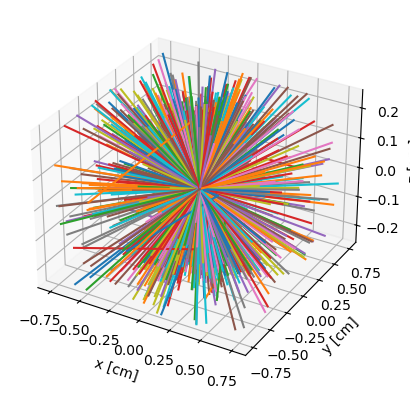

In [57]:
import openmc
import numpy as np
import openmc.data
from pathlib import Path
import matplotlib.pyplot as plt

import os

os.environ["OPENMC_CROSS_SECTIONS"] = "/home/harriet/OPENMC/mcnp_endfb70/cross_sections.xml"

###############################################################################
#                      Simulation Input File Parameters
###############################################################################

# OpenMC simulation parameters
batches = 30
inactive = 10
particles = 4000000

statepoints_folder = Path('statepoints_folder')

###############################################################################
#                 Exporting to OpenMC materials.xml file
###############################################################################

# Create materials
rock = openmc.Material(material_id=1, name='Rock')
rock.add_element('Si', 0.0085514332)
rock.add_nuclide('O16', 0.622)
rock.add_element('Al', 0.101)
rock.add_nuclide('Fe56',1.0)
rock.set_density('g/cm3', 2.65)


water = openmc.Material(material_id=2,name='Water')
water.add_element('H', 2)
water.add_nuclide('O16', 1)
water.set_density('g/cm3', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')

# Instantiate a Materials collection and export to XML
materials_file = openmc.Materials([rock, water])
materials_file.export_to_xml()

###############################################################################
#                 Exporting to OpenMC geometry.xml file
###############################################################################


# Create surfaces
wall_thickness = 0.5
water_thickness = 0.5
wall_length= 1.5
water_length= 1.5



# Create surfaces for rock wall
left_surface_rock = openmc.XPlane(surface_id=1,x0=-wall_length/2, boundary_type='vacuum')
right_surface_rock = openmc.XPlane(surface_id=2,x0=wall_length/2, boundary_type='vacuum')
bottom_surface_rock = openmc.YPlane(surface_id=3,y0=-wall_length/2, boundary_type='vacuum')
top_surface_rock = openmc.YPlane(surface_id=4,y0=wall_length/2, boundary_type='vacuum')
front_surface_rock = openmc.ZPlane(surface_id=5,z0=-wall_thickness/2, boundary_type='vacuum')
back_surface_rock = openmc.ZPlane(surface_id=6,z0=wall_thickness/2, boundary_type='vacuum')

# Create surfaces for water wall
left_surface_water = openmc.XPlane(surface_id=7,x0=-water_length/2, boundary_type='vacuum')
right_surface_water = openmc.XPlane(surface_id=8,x0=water_length/2, boundary_type='vacuum')
bottom_surface_water = openmc.YPlane(surface_id=9,y0=-water_length/2, boundary_type='vacuum')
top_surface_water = openmc.YPlane(surface_id=10,y0=water_length/2, boundary_type='vacuum')
front_surface_water = openmc.ZPlane(surface_id=11,z0=-water_thickness/2, boundary_type='vacuum')
back_surface_water = openmc.ZPlane(surface_id=12,z0=water_thickness/2, boundary_type='vacuum')

# Instantiate Cells_for rock wall and water wall. 
cell1 = openmc.Cell(cell_id=1, name='Cell 1')
cell2 = openmc.Cell(cell_id=2, name='Cell 2')
cell1.region = +left_surface_rock & -right_surface_rock & +bottom_surface_rock & -top_surface_rock & +front_surface_rock & -back_surface_rock 
cell2.region = +left_surface_water & -right_surface_water & +bottom_surface_water & -top_surface_water & +front_surface_water & -back_surface_water 
# Register Materials with Cells
cell1.fill = rock
cell2.fill = water
# Create universe
root = openmc.Universe(universe_id=0, name='root universe')
root.add_cell(cell1)
root.add_cell(cell2)
# Instantiate a Geometry, register the root Universe, and export to XML
geometry = openmc.Geometry(root)
geometry.export_to_xml()




###############################################################################
#                   Exporting to OpenMC settings.xml file
###############################################################################

# Create settings
settings = openmc.Settings()
settings.run_mode = 'fixed source'
settings.particles = particles
settings.batches = batches
settings.inactive = inactive
# Define energy distribution
energy = openmc.stats.Discrete([14e6], [1.0])  # Single energy of 14 MeV


source = openmc.IndependentSource(space=openmc.stats.Point(), energy=energy)
source.particle="neutron"
settings.source = source

# Export to "settings.xml"
settings.export_to_xml()

###############################################################################
#                   Exporting to OpenMC tallies.xml file
###############################################################################
# Instantiate an empty Tallies object
tallies = openmc.Tallies()

# Create mesh which will be used for tally
mesh = openmc.RegularMesh(mesh_id=1)
mesh.dimension = [10, 10,5 ]
mesh.lower_left, mesh.upper_right= geometry.bounding_box

# Create mesh filter for tally
mesh_filter = openmc.MeshFilter(mesh)

# Create mesh filters for transmitted and backscattered neutrons
transmitted_filter = openmc.MeshFilter(mesh)
backscattered_filter = openmc.MeshFilter(mesh)

# Create mesh tally to score flux and fission rate
tally = openmc.Tally(tally_id=1,name='flux')
tally.filters = [mesh_filter]
tally.scores = ['flux', 'fission']
tallies.append(tally)

# Define meshes to tally transmitted and backscattered neutrons separately
transmitted_mesh_tally = openmc.Tally(tally_id=2, name='transmitted_neutrons')
transmitted_mesh_tally.filters = [transmitted_filter]
transmitted_mesh_tally.scores = ['flux']
tallies.append(transmitted_mesh_tally)

backscattered_mesh_tally = openmc.Tally(tally_id=3, name='backscattered_neutrons')
backscattered_mesh_tally.filters = [backscattered_filter]
backscattered_mesh_tally.scores = ['flux']
tallies.append(backscattered_mesh_tally)

# Export to "tallies.xml"
tallies.export_to_xml()


# deletes old statepoint and summary files
!rm s*.h5
# Create a simulation model
model = openmc.Model(geometry, materials_file,settings,  tallies)

# Run the simulation
output = model.run(tracks=True)

###############################################################################
#                   Exporting to OpenMC plots.xml file
###############################################################################

plot = openmc.Plot(plot_id=1)
plot.origin = [0, 0, 0]
plot.width = [4, 4]
plot.pixels = [400, 400]
plot.color_by = 'material'

# Instantiate a Plots collection and export to XML
plot_file = openmc.Plots([plot])
plot.geometry=geometry
openmc.plot_inline(plot)
plot_file.export_to_xml()

# Load the statepoint file
sp = openmc.StatePoint('/home/harriet/OPENMC/openmc/examples/my_work/statepoint.30.h5')
tally = sp.get_tally(scores=['flux'])
tracks = openmc.Tracks('tracks.h5')
pp =tracks.filter(particle='neutron')
pp.plot() #this plots the tracks in 3D

# gets the first track from the 10 tracks. This is 10 because we simulated 10 particles
track = tracks[0]

# get the primary particle track from this particle
one_particle = track.particle_tracks[0]

# prints out the x position, y position, z position, x direction, y direction, z direction, energy, weight (varience reduction is off), cell id and material id
print(one_particle.states)

'''
vox_plot = openmc.Plot(plot_id=2)
vox_plot.type = 'voxel'
vox_plot.width = (1300., 1300., 1300.)
vox_plot.pixels = (100, 100, 100)
vox_plot.filename = 'plot_3d'
vox_plot.color_by = 'material'
plots = openmc.Plots([vox_plot])
vox_plot.geometry=geometry
openmc.plot_inline(geometry)

'''

'''
first_track = tracks[0]
tracks.filter(particle='neutron')
first_track.particle_tracks


#task1: to figure out the correct way to get the track and select only the neutron tracks. 
# Get tallies for transmitted and backscattered neutrons
transmitted_tally = sp.get_tally(name='transmitted_neutrons')
backscattered_tally = sp.get_tally(name='backscattered_neutrons')

# Extract energy and flux data
transmitted_energy = transmitted_tally.mean[:, 0]
transmitted_flux = transmitted_tally.mean[:, 1]
backscattered_energy = backscattered_tally.mean[:, 0]
backscattered_flux = backscattered_tally.mean[:, 1]


# Extract tally data
transmitted_flux = transmitted_tally.mean.flatten()
backscattered_flux = backscattered_tally.mean.flatten()


# Plot transmitted neutron energy spectrum
plt.figure()
plt.plot(transmitted_energy, transmitted_flux)
plt.title('Transmitted Neutron Energy Spectrum')
plt.xlabel('Energy (eV)')
plt.ylabel('Flux')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# Plot backscattered neutron energy spectrum
plt.figure()
plt.plot(backscattered_energy, backscattered_flux)
plt.title('Backscattered Neutron Energy Spectrum')
plt.xlabel('Energy (eV)')
plt.ylabel('Flux')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()
'''
